## Import all dependencies

In [1]:
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Pick run

In [15]:
# run = input("Pick run: ")
run = "49"

metric_file = open("../saved_runs/"+run+"/metrics.json")
metrics = json.loads(metric_file.read())

returns = metrics["mean episodic return"]

first_time_stamp_return = datetime.fromisoformat(returns["timestamps"][0])

y_values_return = returns["values"]
std_return = np.std(y_values_return, axis=0)/np.sqrt(len(y_values_return))
x_values_return = [(datetime.fromisoformat(timestamp)-first_time_stamp_return).seconds / 3600 for timestamp in returns["timestamps"]] # Hours in

losses = metrics["influence loss"]

first_time_stamp_loss = datetime.fromisoformat(losses["timestamps"][0])

y_values_loss = losses["values"]
std_loss = np.std(y_values_loss, axis=0)/np.sqrt(len(y_values_loss))
x_values_loss = [(datetime.fromisoformat(timestamp)-first_time_stamp_loss).seconds / 3600 for timestamp in losses["timestamps"]] # Hours in

## Create graph

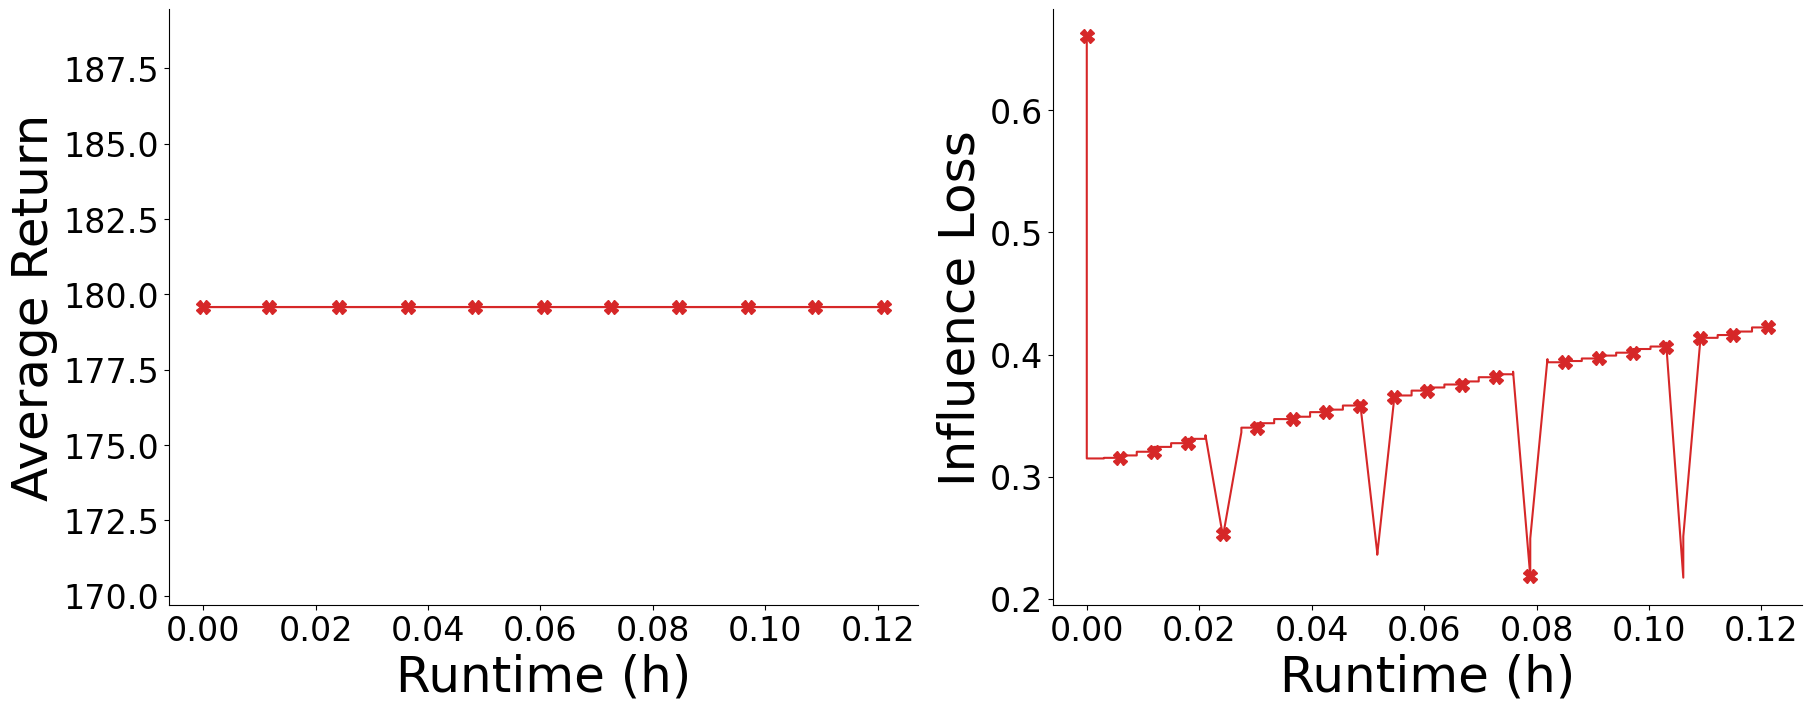

In [16]:
color_return = "C3"
color_loss = "C4"

fig, ax = plt.subplots(1, 2, figsize=(18,7), constrained_layout=True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].tick_params(labelsize=24)
ax[0].set_ylabel('Average Return', fontsize=36)
ax[0].set_xlabel('Runtime (h)', fontsize=36)

ax[0].fill_between(x_values_return, y_values_return-std_return, y_values_return+std_return, alpha=0.3, color=color_return)
ax[0].plot(x_values_return, y_values_return, marker="X", markevery=4, markersize=10, color=color_return)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].tick_params(labelsize=24)
ax[1].set_ylabel('Influence Loss', fontsize=36)
ax[1].set_xlabel('Runtime (h)', fontsize=36)

ax[1].fill_between(x_values_loss, y_values_loss-std_loss, y_values_loss+std_loss, alpha=0.3, color=color_loss)
ax[1].plot(x_values_loss, y_values_loss, marker="X", markevery=4, markersize=10, color=color_loss)